In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
df_fair = sm.datasets.fair.load_pandas().data

In [4]:
df = df_fair
# 2: poor
# 3: fair
df = df.assign(poor_marriage_yn
               =(df.rate_marriage <= 2),
               affairs_yn=(df.affairs > 0))
df_fair_21 = df

In [5]:
df = df_fair_21

df = (df
      .groupby(['poor_marriage_yn', 'affairs_yn'])
      [['affairs']]
      .count()
      .unstack()
      .droplevel(axis=1, level=0))

df_pct = df.apply(axis=1, func=lambda r: r/r.sum())

display(df, df_pct)

print('p-value:',
      sp.stats.chi2_contingency(
          df,
          correction=False
      )[1])

affairs_yn,False,True
poor_marriage_yn,,
False,4161,1758
True,152,295


affairs_yn,False,True
poor_marriage_yn,,
False,0.702990,0.297010
True,0.340045,0.659955


p-value: 1.9460298519537103e-56


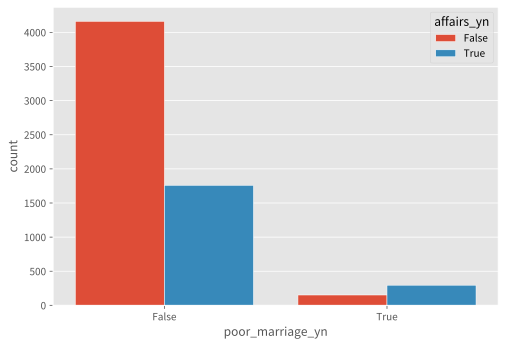

In [6]:
df = df_fair_21
sns.countplot(data=df,
              x='poor_marriage_yn', hue='affairs_yn',
              saturation=0.95, edgecolor='white')

In [7]:
df = df_fair_21
# 2: farming-like
# 3: white-colloar
df = df[df.occupation.isin([2, 3])]
df_fair_22 = df

In [8]:
df = df_fair_22

df = (df
      .groupby(['occupation', 'affairs_yn'])
      [['affairs']]
      .count()
      .unstack()
      .droplevel(axis=1, level=0))

df_pct = df.apply(axis=1, func=lambda r: r/r.sum())

display(df, df_pct)

print('p-value:',
      sp.stats.chi2_contingency(
          df,
          correction=False
      )[1])

affairs_yn,False,True
occupation,,
2.0,607,252
3.0,1818,965


affairs_yn,False,True
occupation,,
2.0,0.706636,0.293364
3.0,0.653252,0.346748


p-value: 0.0037369587127306517


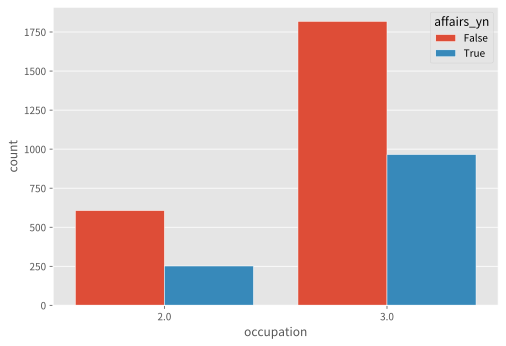

In [9]:
df = df_fair_22
sns.countplot(data=df,
              x='occupation', hue='affairs_yn',
              saturation=0.95, edgecolor='white')

In [10]:
print('p-value:',
      sp.stats.chi2_contingency(
          [[607, 252],
           [1818, 965]],
          correction=False
      )[1])

p-value: 0.0037369587127306517
